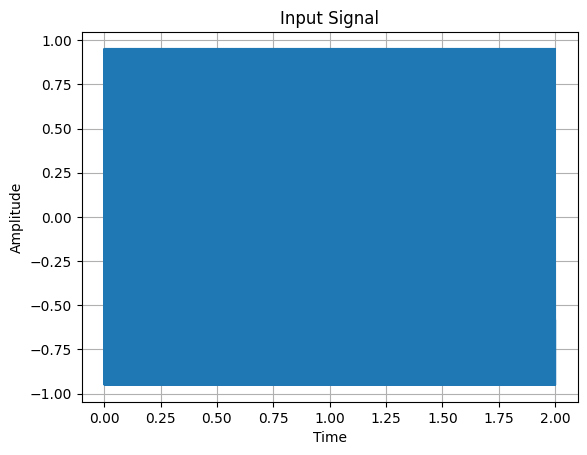

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft
from matplotlib import patches

# Load the input signal from a file named 'input_signal.npy'
s = np.load('input_signal.npy')

# A: Plot the entire input signal
Xn = np.arange(0, 2, 0.0002)
plt.plot(Xn, s)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.grid()
plt.show()

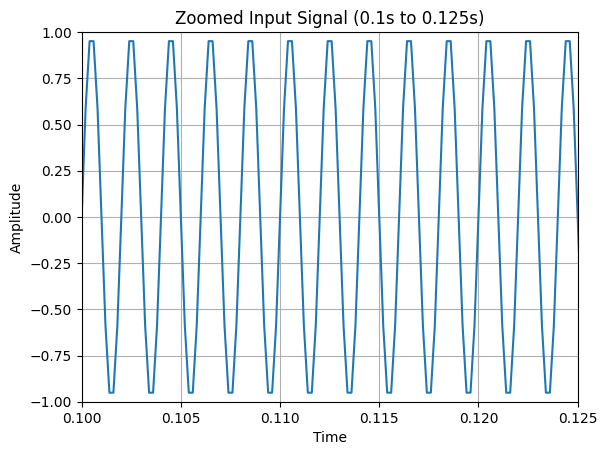

In [2]:
# B: Plot a zoomed portion of the input signal
plt.plot(Xn, s)
plt.axis([0.1, 0.125, -1, 1])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Zoomed Input Signal (0.1s to 0.125s)')
plt.grid()
plt.show()


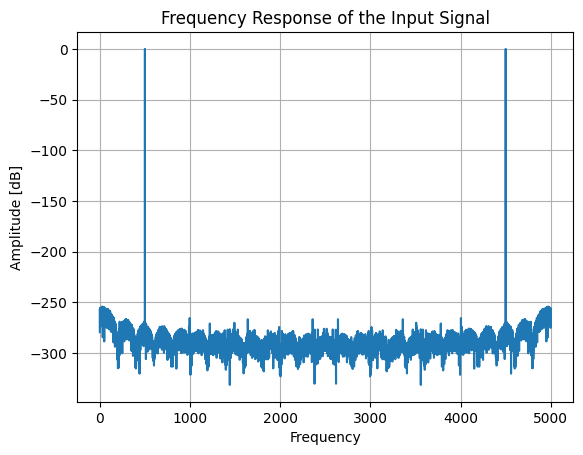

In [3]:
# C: Compute and plot the frequency response (magnitude in dB) of the input signal
Sfft = fft(s)
D = 20 * np.log10(abs(Sfft) / 5000)
Dn = np.linspace(0, ((10000 - 1) / 10000) * 5000, 10000)
plt.plot(Dn, D)
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.title('Frequency Response of the Input Signal')
plt.grid()
plt.show()


In [4]:
# Find peaks in the frequency response
peak = find_peaks(D, -100)
print("Peaks:", peak)
print("Frequency at index 1000:", Dn[1000])
print("Frequency at index 9000:", Dn[9000])


Peaks: (array([1000, 9000], dtype=int64), {'peak_heights': array([-4.72520459e-14, -4.72520459e-14])})
Frequency at index 1000: 500.0
Frequency at index 9000: 4500.0


In [5]:
# E + H: Design a digital filter
fs = 5000
fr1 = 500
fr2 = 4500
w1 = 2 * np.pi * (fr1 / fs)
w2 = 2 * np.pi * (fr2 / fs)
w = np.linspace(0, 2 * np.pi, 1000)
z = np.exp(-1j * w)
H = ((z - np.exp(1j * w1)) * (z - np.exp(1j * w2))) / ((z - 0.9 * np.exp(1j * w1)) * (z - 0.9 * np.exp(1j * w2)))


C:\Users\Itamar\Desktop\HW8\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


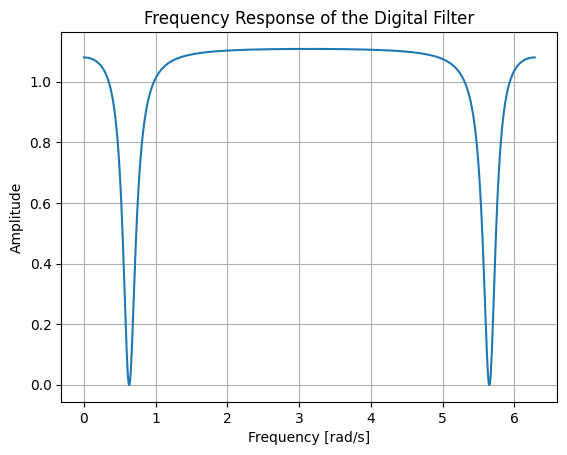

In [6]:
# Plot the frequency response of the filter
plt.plot(w, H)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude')
plt.title('Frequency Response of the Digital Filter')
plt.grid()
plt.show()

In [7]:
# G: Plot the poles and zeros of the digital filter's transfer function
def zplane(b, a, filename=None):
    # Create a complex z-plane plot given the transfer function coefficients b and a

    # Get a figure/plot
    ax = plt.subplot(111)

    # Create the unit circle
    uc = patches.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)

    # Normalize the coefficients if necessary
    if np.max(b) > 1:
        kn = np.max(b)
        b = b / float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a / float(kd)
    else:
        kd = 1

    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn / float(kd)

    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0, markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp(t2, markersize=12.0, markeredgewidth=3.0, markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Set the plot limits and ticks
    r = 1.5
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]
    plt.xticks(ticks)
    plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

    return z, p, k

In [8]:
# Define the filter's poles and zeros
Poles = [1.0, -(0.9 * np.exp(1j * -w1) + 0.9 * np.exp(1j * w1)), 0.81]
Zeros = [1.0, -(np.exp(1j * -w1) + np.exp(1j * w1)), 1.0]


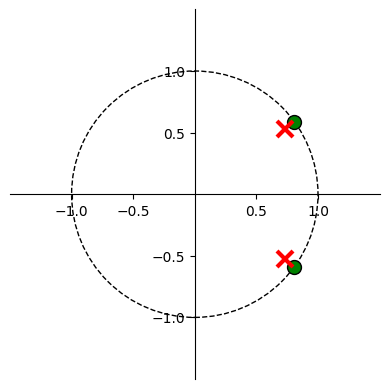

In [9]:
# Plot the poles and zeros in the z-plane
PZ = zplane(Zeros, Poles, filename=None)

# I + J + k: Apply the digital filter to the input signal
nw = np.linspace(0, 2, 10000)
y = np.zeros(10000)

for n in range(2, 9998):
    y[n] = s[n] - 2 * np.cos(np.pi / 5) * s[n - 1] + s[n - 2] + 1.8 * np.cos(np.pi / 5) * y[n - 1] - 0.81 * y[n - 2]


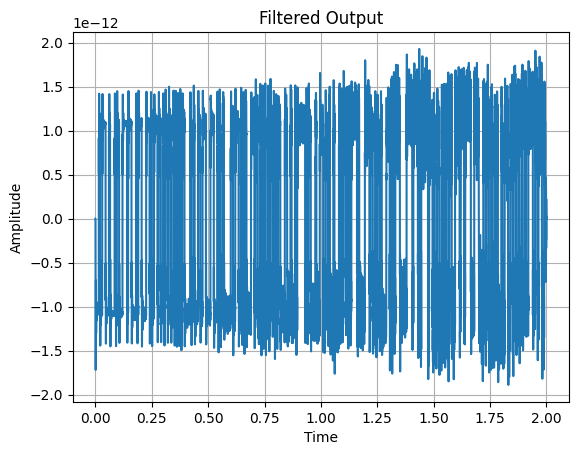

In [10]:
# Plot the filtered output
plt.plot(nw, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Output')
plt.grid()
plt.show()


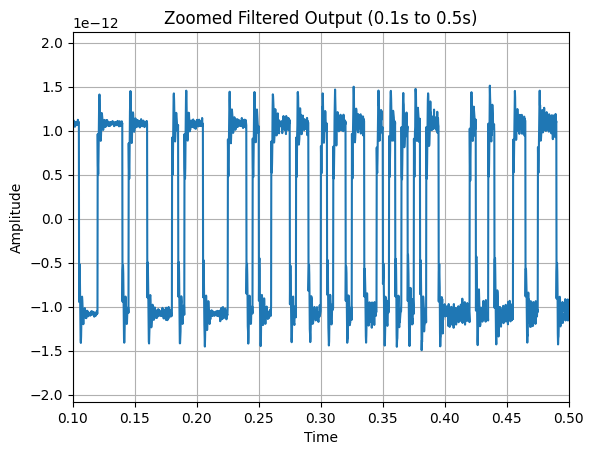

In [11]:
# L: Plot a zoomed-in portion of the filtered output
plt.plot(nw, y)
plt.xlim(0.1, 0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Zoomed Filtered Output (0.1s to 0.5s)')
plt.grid()
plt.show()

In [12]:
# M: Create a thresholded signal (binary signal)
def threshold(y):
    Ny = np.zeros(10000)
    for n in range(0, 10000):
        if y[n] >= 0:
            Ny[n] = 1
        else:
            Ny[n] = 0
    return Ny

ny = threshold(y)


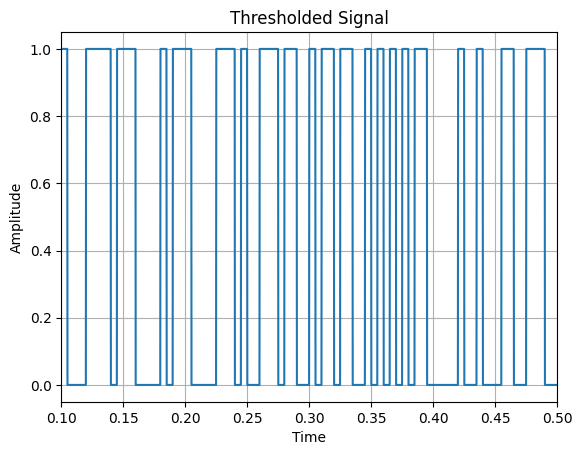

1 bit signal rate = 5ms


In [13]:
# Plot the thresholded signal
plt.plot(nw, ny)
plt.xlim(0.1, 0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Thresholded Signal')
plt.grid()
plt.show()

# O: Note - 1 bit signal rate = 5ms
print("1 bit signal rate = 5ms")